# Neural Nets

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, classification_report
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["figure.facecolor"] = 'green'

In [21]:
import warnings
warnings.simplefilter('ignore')

In [4]:
train = pd.read_csv('../../1 - Base de Datos/trainset.csv')
test = pd.read_csv('../../1 - Base de Datos/testset.csv')

After importing, we would like to get rid of the useless variables

In [5]:
train = train.drop(['t_mode0', 'id'], axis = 1)
train

,t_key0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
0,2.217079,139.731754,0.869118,0.519249,0.029225,0.319573,0.002967,0.091678,0.188732,26.457350,34.0,2
1,4.304625,140.968235,1.910310,0.769341,0.067253,0.023262,0.000000,0.052209,0.663667,23.141670,2.0,1
2,4.304625,109.520199,0.977668,0.253525,0.026992,0.364818,0.001985,0.074177,0.444230,29.855429,62.0,4
3,3.828397,75.954996,1.509001,0.931646,0.106186,0.139922,0.000000,0.120665,0.491329,31.462427,19.0,1
4,3.828397,91.244236,1.555391,0.545826,0.035371,0.251469,0.149262,0.083623,0.272233,34.090480,43.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
55538,2.792290,99.378870,0.801867,0.794231,0.028857,0.372771,0.019271,0.075931,0.508438,28.594121,21.0,2
55539,4.759356,67.733888,1.578883,1.080321,0.026234,0.055875,0.090453,0.055344,0.577249,29.173179,61.0,4
55540,1.585640,79.729731,1.151453,0.539139,0.060791,0.356601,0.146158,0.080106,0.186817,30.648736,46.0,3
55541,0.000000,112.341610,0.681757,1.461288,0.038889,0.031446,0.002967,0.135733,0.483206,32.814888,30.0,2


In [6]:
test = test.drop(['id', 't_mode0'], axis = 1)
test

,t_key0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
0,3.873489,102.077434,1.136005,0.652068,0.038806,0.245297,0.000004,0.061371,0.313870,20.325737,56.0,3
1,1.595405,163.222452,1.559666,1.375892,0.090603,0.000999,0.144474,0.079899,0.237952,32.519312,22.0,2
2,4.359420,113.531853,1.593801,1.504156,0.052763,0.030623,0.005559,0.070192,0.776168,26.369467,22.0,2
3,3.873489,96.792061,1.289259,1.595320,0.048714,0.151174,0.000000,0.034878,0.862629,32.618254,50.0,3
4,4.359420,102.640817,1.814995,1.031562,0.036711,0.015053,0.000002,0.089617,0.838169,25.157347,35.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
13915,2.818702,99.719946,1.600679,0.831035,0.037569,0.018946,0.103679,0.069281,0.600305,24.187840,38.0,2
13916,2.234779,101.497938,1.019791,0.959192,0.110699,0.217217,0.000132,0.084223,0.559692,22.902543,13.0,1
13917,0.872924,94.083821,1.800220,0.697523,0.098733,0.055606,0.000030,0.128551,0.557033,24.600776,37.0,2
13918,4.359420,151.217946,0.663220,1.584771,0.076646,0.000053,0.147484,0.085346,0.373928,32.167959,28.0,2


Remove variables high in popularity as they are underrepresented

In [7]:
# train = train.drop(train[train['popularity'] > 60].index)
# test = test.drop(test[test['popularity'] > 60].index)


Check the shapes of the dataframes we are working with here

In [9]:
print(train.shape)
print(test.shape)

(55543, 12)
(13920, 12)


Generate X_train, X_test, y_train, y_test

In [25]:
X_train = train.drop(['popularity', 'ClasePopularidad'], axis = 1)
y_train_reg = train['popularity']
y_train_clas = train['ClasePopularidad']
X_test = test.drop(['popularity', 'ClasePopularidad'], axis = 1)
y_test_reg = test['popularity']
y_test_clas = test['ClasePopularidad']


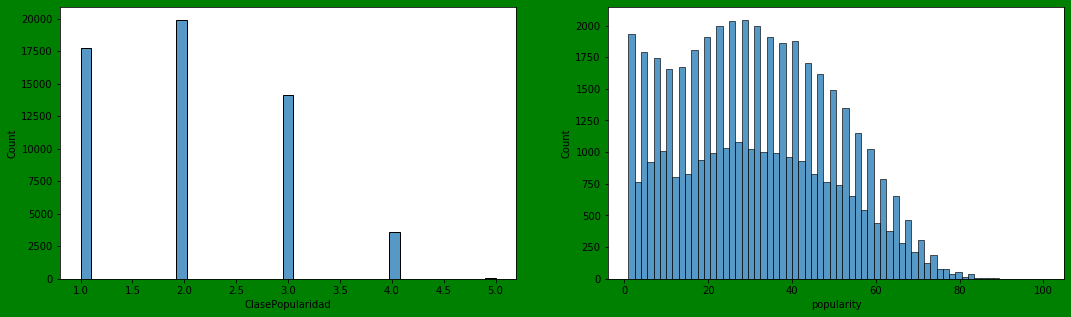

In [59]:
fig, axs = plt.subplots(1, 2, figsize = (18, 5)) # This is tuple unpacking at its best
axs[0] = sns.histplot(y_train_clas, ax = axs[0])
axs[1] = sns.histplot(train['popularity'], ax = axs[1])


Generate X_train_scaled, X_test_scaled.
To do that we will import Standard Scaler from sklearn.preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler
# Instantiate the Object
scaler = StandardScaler()
# Fit the object to the train dataset
scaler.fit(X_train)
# Transform the train and test dataset (note we do not fit to the test in order to prevent leakage)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Also reduce the dimensionality of the features with PCA, applied to the previously generated X_train_scaled

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

Initialize the Neural Net.
We are going to use a Multi-Layer-Perceptron here, to check out how it performs.  
I suspect it will probably do better than earlier methods.  
We are going to use 4 neural networks:  
<ul>
<li> nn1: x_train_scaled to popularity (regression)
<li> nn2: x_train_scaled to ClasePopularidad (classification)
<li> nn3: x_train_scaled_pca to popularity (regression)
<li> nn4: x_train_scaled_pca to ClasePopularidad (classification)  
<ul>  

Each will have a different structure based on the inputs it receives

In [89]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
neural_net1 = MLPRegressor(max_iter = 300, activation = 'relu', hidden_layer_sizes = (16, 16), solver = 'adam', random_state = 42, tol = 0.00005, verbose = False)
neural_net2 = MLPClassifier(max_iter = 300, activation = 'relu', hidden_layer_sizes = (16, 16), solver = 'adam', random_state = 42, tol = 0.00005, verbose = False)
neural_net3 = MLPRegressor(max_iter = 300, activation = 'relu', hidden_layer_sizes = (10, 10, 10, 10, 10), solver = 'adam', random_state = 42, tol = 0.00005, verbose = True)
neural_net4 = MLPClassifier(max_iter = 300, activation = 'relu', hidden_layer_sizes = (10, 10, 10, 10, 10), solver = 'adam', random_state = 42, tol = 0.00005, verbose = False)

Fit & predict each neural net

Neural Net 1: x_train_scaled to y_test_reg

In [ ]:
neural_net1.fit(X_train_scaled, y_train_reg)

In [14]:
y_pred = neural_net1.predict(X_test_scaled) # y_pred is now an array
y_pred = pd.DataFrame(y_pred, index = y_test_reg.index) # y_pred is now a DataFrame
y_test = pd.DataFrame(y_test_reg)
diff = pd.concat([y_pred ,y_test], axis = 1)
diff = diff.rename(columns = {0 : 'y_pred', 'popularity' : 'y_test' })
mse = mean_squared_error(diff['y_test'], diff['y_pred'])
r_squared = r2_score(diff['y_test'], diff['y_pred'])
print(f'El mse es : {mse} y el r2 es : {r_squared}')
diff

El mse es : 315.1219008262681 y el r2 es : 0.08046381807640945


,y_pred,y_test
0,29.726741,56.0
1,18.958261,22.0
2,35.620229,22.0
3,35.156395,50.0
4,38.630087,35.0
...,...,...
13915,26.229215,38.0
13916,25.130310,13.0
13917,29.844585,37.0
13918,28.061043,28.0


Neural Net 2: x_train_scaled to y_test_clas

In [15]:
neural_net2.fit(X_train_scaled, y_train_clas)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 16), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=5e-05,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [68]:
y_pred = neural_net2.predict(X_test_scaled) # y_pred is now an array
y_pred = pd.DataFrame(y_pred) # y_pred is now a DataFrame
y_test = pd.DataFrame(y_test_clas)
diff = pd.concat([y_pred, y_test], axis = 1)
diff = diff.rename(columns = {0 : 'y_pred', 'ClasePopularidad' : 'y_test' })
conf = pd.DataFrame(confusion_matrix(y_test, y_pred))
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f'El F1 Score del modelo es de {f1}')
print(classification_report(y_test, y_pred))

El F1 Score del modelo es de 0.3835704895313443
              precision    recall  f1-score   support

           1       0.45      0.47      0.46      4488
           2       0.38      0.54      0.45      4914
           3       0.38      0.24      0.29      3592
           4       0.00      0.00      0.00       904
           5       0.00      0.00      0.00        22

    accuracy                           0.41     13920
   macro avg       0.24      0.25      0.24     13920
weighted avg       0.38      0.41      0.38     13920



Podemos observar que el modelo con la red neural es apenas mejor que el modelo realizado con un Random Forest 

In [69]:
conf

,0,1,2,3,4
0,2120,1916,452,0,0
1,1566,2668,680,0,0
2,818,1910,864,0,0
3,206,432,266,0,0
4,10,5,7,0,0


In [70]:
diff

,y_pred,y_test
0,1,3
1,1,2
2,2,2
3,2,3
4,2,2
...,...,...
13915,1,2
13916,1,1
13917,1,2
13918,1,2


Neural Net 3: X_train_scaled_pca a y_test_reg

In [86]:
neural_net3.fit(X_train_scaled_pca, y_train_reg)

Iteration 1, loss = 414.64911940
Iteration 2, loss = 175.89672422
Iteration 3, loss = 166.96986245
Iteration 4, loss = 165.50892194
Iteration 5, loss = 165.01516166
Iteration 6, loss = 164.69750559
Iteration 7, loss = 164.50842035
Iteration 8, loss = 164.34185110
Iteration 9, loss = 164.17813549
Iteration 10, loss = 164.08020584
Iteration 11, loss = 163.99199041
Iteration 12, loss = 163.92402903
Iteration 13, loss = 163.87590431
Iteration 14, loss = 163.77530426
Iteration 15, loss = 163.73297902
Iteration 16, loss = 163.59689072
Iteration 17, loss = 163.60681891
Iteration 18, loss = 163.54752884
Iteration 19, loss = 163.53445487
Iteration 20, loss = 163.44500701
Iteration 21, loss = 163.33565547
Iteration 22, loss = 163.26760883
Iteration 23, loss = 163.18145836
Iteration 24, loss = 163.19652590
Iteration 25, loss = 163.30577658
Iteration 26, loss = 163.14513293
Iteration 27, loss = 163.09285460
Iteration 28, loss = 163.11407882
Iteration 29, loss = 162.98600930
Iteration 30, loss = 16

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10, 10, 10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=300, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=5e-05,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [87]:
print(X_train_scaled_pca.shape)
print(X_test_scaled_pca.shape)

(55543, 4)
(13920, 4)


In [88]:
y_pred = neural_net3.predict(X_test_scaled_pca) # y_pred is now an array
y_pred = pd.DataFrame(y_pred) # y_pred is now a DataFrame
y_test = pd.DataFrame(y_test_reg)
diff = pd.concat([y_pred ,y_test], axis = 1)
diff = diff.rename(columns = {0 : 'y_pred', 'popularity' : 'y_test' })
mse = mean_squared_error(diff['y_test'], diff['y_pred'])
r_squared = r2_score(diff['y_test'], diff['y_pred'])
print(f'El mse es : {mse} y el r2 es : {r_squared}')
diff

El mse es : 328.95116922958516 y el r2 es : 0.04010955316165954


,y_pred,y_test
0,32.029912,56.0
1,34.563561,22.0
2,34.154104,22.0
3,32.801168,50.0
4,34.293508,35.0
...,...,...
13915,33.546030,38.0
13916,26.702006,13.0
13917,25.298277,37.0
13918,32.620602,28.0


Neural Net 4: X_train_scaled_pca a y_test_clas

In [90]:
neural_net4.fit(X_train_scaled_pca, y_train_clas)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=5e-05,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [91]:
y_pred = neural_net4.predict(X_test_scaled_pca) # y_pred is now an array
y_pred = pd.DataFrame(y_pred) # y_pred is now a DataFrame
y_test = pd.DataFrame(y_test_clas)
diff = pd.concat([y_pred, y_test], axis = 1)
diff = diff.rename(columns = {0 : 'y_pred', 'ClasePopularidad' : 'y_test' })
conf = pd.DataFrame(confusion_matrix(y_test, y_pred))
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f'El F1 Score del modelo es de {f1}')
print(classification_report(y_test, y_pred))

El F1 Score del modelo es de 0.33370179095488245
              precision    recall  f1-score   support

           1       0.43      0.40      0.41      4488
           2       0.37      0.68      0.47      4914
           3       0.41      0.08      0.13      3592
           4       0.00      0.00      0.00       904
           5       0.00      0.00      0.00        22

    accuracy                           0.39     13920
   macro avg       0.24      0.23      0.20     13920
weighted avg       0.37      0.39      0.33     13920



In [92]:
diff

,y_pred,y_test
0,2,3
1,2,2
2,2,2
3,2,3
4,2,2
...,...,...
13915,2,2
13916,1,1
13917,1,2
13918,2,2


In [93]:
conf

,0,1,2,3,4
0,1773,2575,140,0,0
1,1363,3317,234,0,0
2,787,2523,282,0,0
3,219,650,35,0,0
4,7,15,0,0,0
